# 基於聚類區域性異常因子(Cluster-Based Local Outlier Factor)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from tqdm.notebook import tqdm

# MNIST Dataset

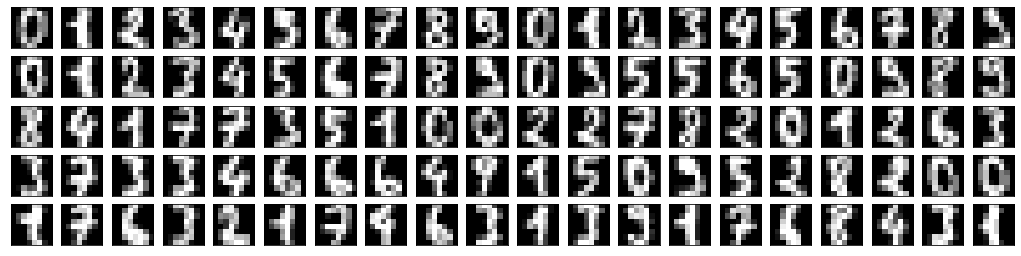

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X=(digits.data/16)
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# Principal Component Anlysis

In [3]:
def PCA(X,n_components,N):
    X_center=X-np.mean(X,axis=0)
    W,D,V=np.linalg.svd(X_center.T)
    X_embedded=np.dot(X_center,W[:,:n_components])
    return X_embedded

# Squeezer

In [13]:
k=50
N,M=X.shape
init_index=np.random.randint(0,N,k)
init_index=init_index.astype(int)
k_mean=X[init_index]
max_iter=300
for t in range(max_iter):
    dist=sp.spatial.distance.cdist(X,k_mean,metric='euclidean')
    cluster_index=np.argmin(dist,axis=1)
    for i in range(k):
        BOOL=(cluster_index==i)
        k_mean[i]=np.mean(X[BOOL],axis=0)
cluster_size=np.zeros(k,dtype=int)
for i in range(k):
    cluster_size[i]=np.sum(cluster_index==i)
    print("cluster",i,":",cluster_size[i])

cluster 0 : 77
cluster 1 : 55
cluster 2 : 21
cluster 3 : 35
cluster 4 : 61
cluster 5 : 31
cluster 6 : 7
cluster 7 : 7
cluster 8 : 34
cluster 9 : 38
cluster 10 : 36
cluster 11 : 11
cluster 12 : 29
cluster 13 : 42
cluster 14 : 47
cluster 15 : 32
cluster 16 : 48
cluster 17 : 46
cluster 18 : 23
cluster 19 : 19
cluster 20 : 17
cluster 21 : 13
cluster 22 : 64
cluster 23 : 30
cluster 24 : 29
cluster 25 : 11
cluster 26 : 55
cluster 27 : 45
cluster 28 : 59
cluster 29 : 28
cluster 30 : 60
cluster 31 : 41
cluster 32 : 18
cluster 33 : 66
cluster 34 : 33
cluster 35 : 41
cluster 36 : 27
cluster 37 : 53
cluster 38 : 47
cluster 39 : 57
cluster 40 : 35
cluster 41 : 82
cluster 42 : 23
cluster 43 : 22
cluster 44 : 17
cluster 45 : 27
cluster 46 : 52
cluster 47 : 12
cluster 48 : 13
cluster 49 : 21


# CBLOF

In [14]:
threshold=20
BOOL=cluster_size>=threshold
data_bool=np.zeros(N,dtype=int)
LC_cluster=np.array(np.where(BOOL)).ravel()
for i in range(k):
    if(i in LC_cluster):
        data_bool[cluster_index==i]=True
    else:
        data_bool[cluster_index==i]=False
CBLOF=np.zeros(N)
for i in range(N):
    if(data_bool[i]==True):
        CBLOF[i]=cluster_size[cluster_index[i]]*np.sqrt(np.sum((X[i]-k_mean[cluster_index[i]])**2))
    else:
        min_dist=min(np.sqrt(np.sum((X[i]-k_mean[BOOL])**2,axis=1)))
        CBLOF[i]=cluster_size[cluster_index[i]]*min_dist

# Histogram

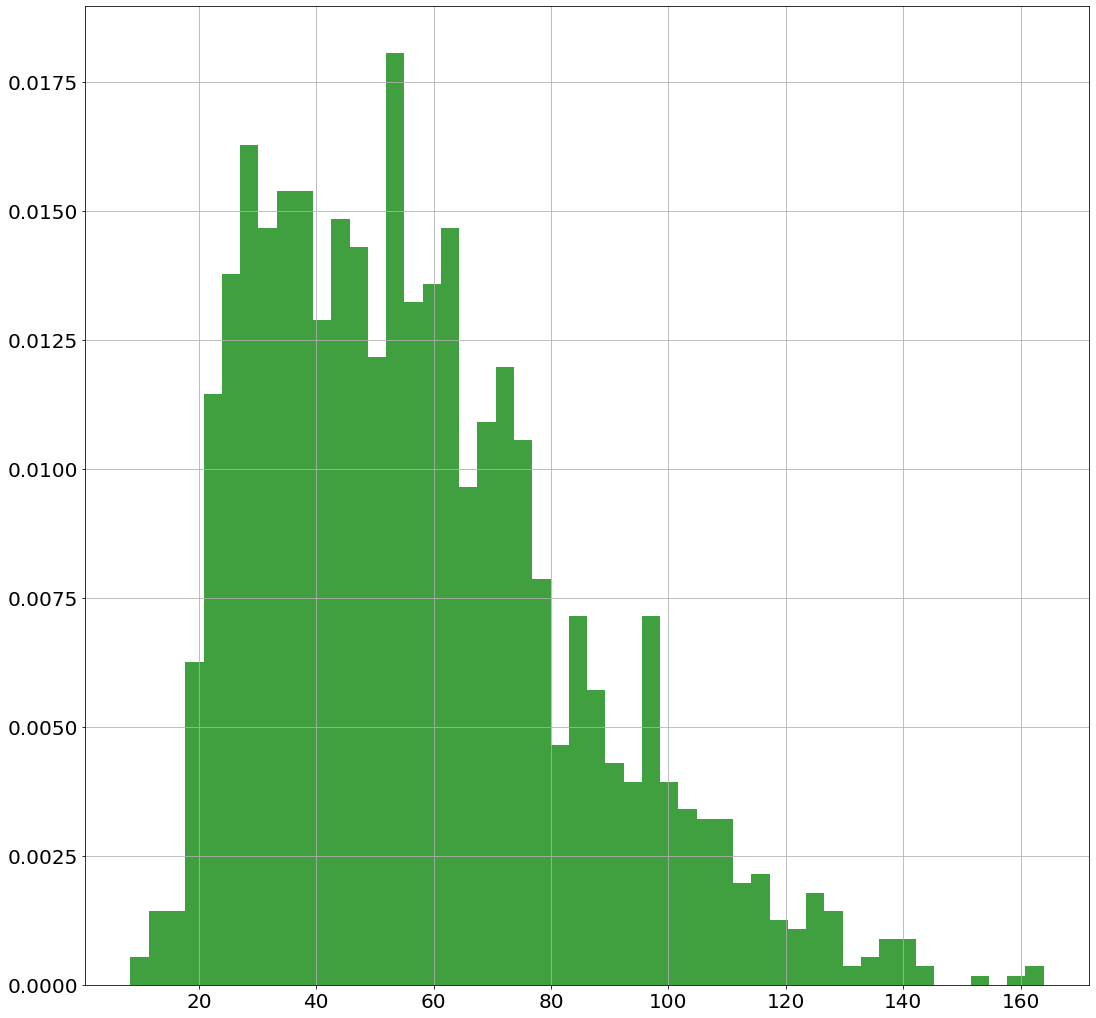

In [15]:
plt.rcParams["figure.figsize"] = (18,18)
plt.hist(CBLOF, 50, density=True, facecolor='g', alpha=0.75)
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Plot

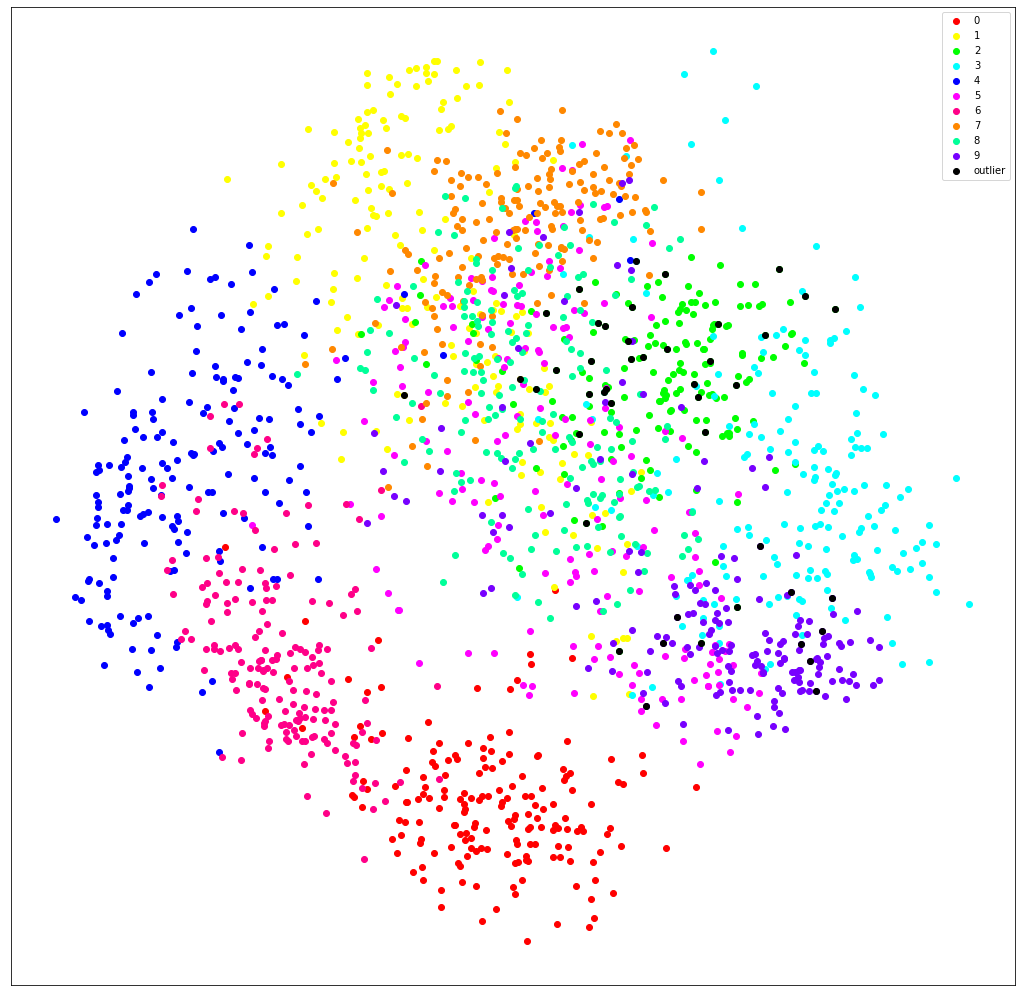

In [16]:
X_embedded=PCA(X,2,N)
cutoff=120
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF"]
plt.rcParams["figure.figsize"] = (18,18)
for i in range(0,10):
    BOOL=(y==i)
    plt.scatter(X_embedded[BOOL,0],X_embedded[BOOL,1],c=color[i],label=i)
outlier=np.array(np.where(CBLOF>cutoff)).ravel()
plt.scatter(X_embedded[outlier,0],X_embedded[outlier,1],c="k",label="outlier")
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=10)
plt.show()

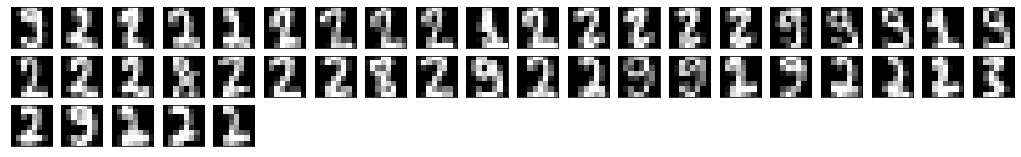

In [17]:
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
i=0
for olr in outlier:
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[olr], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    i+=1
plt.show() 